In [17]:
import pickle
with open('ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('ROMS_26yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

In [27]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho']
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho']
lat_rho = np.transpose(lat_rho, axes=(1, 0))
z_r = np.load('/home/z5297792/MRes/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
h = dataset.variables['h']
h = np.transpose(h, (1, 0))
previous_file_idx = -1
TOTAL_NUM_DAYS = len(daydic)

import re
def extract_number(s):
    match = re.search(r'\d+', s)
    return int(match.group()) if match else None

(np.float64(147.1),
 np.float64(162.21804721948396),
 np.float64(-41.545855397466454),
 np.float64(-25.117712108547657))

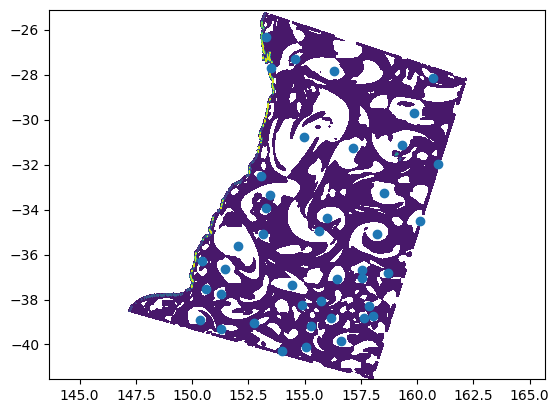

In [42]:
DAY = 'Day30'

if 'ow' not in locals():
    ow = np.load('/srv/scratch/z5297792/Climatology/ow_and_cur_speeds/ow_01461.npy')
    
data = daydic[DAY]

t = extract_number(DAY) - 1 

plt.contourf(lon_rho, lat_rho, ow[:, :, 0, t])
plt.scatter(data.Lon, data.Lat)

plt.axis('equal')